<a href="https://colab.research.google.com/github/RodolfoFerro/dl-facilito-g2/blob/main/notebooks%20/solutions/Deep_Learning_Clase_3_(Soluci%C3%B3n).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning - Clase 3  🧠

> **Descripción:** Cuaderno de contenidos (III) sobre introducción a _deep learning_ para el Bootcamp en DS con Código Facilito, 2023. <br>
> **Autor:** [Rodolfo Ferro](https://github.com/RodolfoFerro) <br>
> **Contacto:** [Twitter](https://twitter.com/rodo_ferro) / [Instagram](https://www.instagram.com/rodo_ferro/) 


## Contenido

### Sección VII

25. Refresher sobre ANNs
    - Neuronas artificiales
    - Entrenamiento
26. ANNs con TensorFlow


### Sección VIII

27. Introducción a imágenes
28. Espacios de color
29. Convoluciones & Pooling


### Sección IX – Tarea

30. Redes convolucionales
31. Clasificadores de imágenes (LeNet5, etc.)
32. Descripción del reto


## **Sección VII**

### _Refresher_ sobre ANNs

Veamos cómo se puede entrenar una sola neurona para hacer una predicción.

Para este problema construiremos un perceptrón simple, como el propuesto por McCulloch & Pitts, usando la función sigmoide.

#### **Planteamiento del problema:**

Queremos mostrarle a una neurona simple un conjunto de ejemplos para que pueda aprender cómo se comporta una función. El conjunto de ejemplos es el siguiente:

- `(1, 0)` debería devolver `1`.
- `(0, 1)` debe devolver `1`.
- `(0, 0)` debería devolver `0`.

Entonces, si ingresamos a la neurona el valor de `(1, 1)`, debería poder predecir el número `1`.

> ¿Puedes adivinar la función?

#### ¿Que necesitamos hacer?

Programar y entrenar una neurona para hacer predicciones.

En concreto, vamos a hacer lo siguiente:

- Construir la clase y su constructor.
- Definir la función sigmoidea y su derivada
- Definir el número de épocas para el entrenamiento.
- Resolver el problema y predecir el valor de la entrada deseada

In [ ]:
import numpy as np


class ArtificialNeuron():
    def __init__(self, n):
        """Class constructor.
        
        Parameters
        ----------
        n : int
            Input size.
        """
        
        np.random.seed(123)
        self.synaptic_weights = 2 * np.random.random((n, 1)) - 1

    def __sigmoid(self, x):
        """Sigmoid function.
        
        Parameters
        ----------
        x : float
            Input value to sigmoid function.
        """
        
        return 1 / (1 + np.exp(-x))

    def __sigmoid_derivative(self, x):
        """Derivative of the Sigmoid function.
        
        Parameters
        ----------
        x : float
            Input value to evaluated sigmoid function."""

        return x * (1 - x)

    def train(self, training_inputs, training_output, iterations):
        """Training function.
        
        Parameters
        ----------
        training_inputs : list
            List of features for training.
        training_outputs : list
            List of labels for training.
        iterations : int
            Number of iterations for training.
        
        Returns
        -------
        history : list
            A list containing the training history.
        """

        history = []
        
        for iteration in range(iterations):
            output = self.predict(training_inputs)
            
            # MSE
            output_col = training_output.reshape((len(training_inputs), 1))
            error = np.mean((output_col - output)**2)
            
            adjustment = np.dot(training_inputs.T, error *
                                self.__sigmoid_derivative(output))
            self.synaptic_weights += adjustment

            history.append(np.linalg.norm(error))
        
        return history

    def predict(self, inputs):
        """Prediction function. Applies input function to inputs tensor.
        
        Parameters
        ----------
        inputs : list
            List of inputs to apply sigmoid function.
        """
        
        return self.__sigmoid(np.dot(inputs, self.synaptic_weights))

### Generando las muestras

Ahora podemos generar una lista de ejemplos basados en la descripción del problema.

In [ ]:
# Training samples
input_values = [(0, 1), (1, 0), (0, 0)]
output_values = [1, 1, 0]

training_inputs = np.array(input_values)
training_output = np.array(output_values).T.reshape((3, 1))

### Entrenando la neurona

Para hacer el entrenamiento, primero definiremos una neurona. De forma predeterminada, contendrá pesos aleatorios (ya que aún no se ha entrenado):

In [ ]:
# Initialize the neuron
neuron = ArtificialNeuron(2)
print("Initial random weights:")
neuron.synaptic_weights

In [ ]:
# TODO.
# Modify the number of epochs to see how it performs.
epochs = 10

# We train the neuron a number of epochs:
history = neuron.train(training_inputs, training_output, epochs)
print("New synaptic weights after training: ")
neuron.synaptic_weights

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

x = np.arange(len(history))
y = history

plt.plot(x, y)

### Haciendo predicciones

In [ ]:
# We predict to verify the performance:
one_one = np.array((1, 1))
print("Prediction for (1, 1): ")
neuron.predict(one_one)

**¿Cómo se haría esto con TensorFlow?**

A continuación recrearemos la misma neurona utilizando TensorFlow.

Para esto, es necesario importar específicamente los tipos de capas y modelos a utilizar.

Analicemos un poco los detalles:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(2,)))

model.compile(loss='mse', optimizer='sgd')

Para entrenar el modelo, también utilizaremos el método fit.

In [ ]:
epochs = 10

history = model.fit(training_inputs, training_output, epochs=epochs, batch_size=1)

Y de igual manera, podemos acceder al historial de entrenamiento.

In [ ]:
history.history

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

x = np.arange(len(history.history['loss']))
y = history.history['loss']

plt.plot(x, y)

Ahora, ¿esto cómo escala a trabajar con redes que utilizan más de una capa y más de una neurona? Veamos.

Para resolver un problema más elaborado creando una red profunda, utilizaremos otros datos, los cuales cargaremos a continuación. 

Los datos de Fashion MNIST están disponibles directamente en la API de conjuntos de datos de `tf.keras`. Llamar a load_data en este objeto nos dará dos conjuntos con los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

¿Cómo se ven estos valores? Despleguemos una imagen de entrenamiento y una etiqueta de entrenamiento para saber.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 3000 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print("Label:", training_labels[img_index])
print("Matrix:", training_images[img_index])

Notarás que todos los valores están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si transformamos los valores para tratar todos con valores entre 0 y 1.

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Notemos que cada imagen es sólo una matriz de 28x28 pixeles, sólo con 1 canal de color.

In [ ]:
training_images[0].shape

Exploraremos una segunda forma de crear un modelo secuencial.

In [ ]:
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    # TODO. Dense -> 256, ReLU
    # TODO. Dense -> 10, Softmax
])

Compilaremos y entrenaremos el modelo.

Notemos que se utilizan otros parámetros de compilación.

In [ ]:
mlp_model.compile(
    optimizer=tf.optimizers.SGD(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
mlp_model.fit(training_images, training_labels, epochs=3)

El modelo incluye funciones que nos permiten evaluar sus resultados, utilizand el conjunto de datos de prueba.

In [ ]:
mlp_model.evaluate(test_images, test_labels)

Podemos explorar los resultados del modelo al inferir individualmente con una sola imagen.

In [ ]:
import random

test_index = random.randint(0, 10000 - 1)

plt.imshow(test_images[test_index], cmap='viridis')
plt.axis(False)

print("Label:", test_labels[test_index])
input_image = np.reshape(test_images[test_index], (1, 784))
prediction = mlp_model.predict(np.expand_dims(input_image, axis=-1))
print("Prediction:", np.argmax(prediction))

## **Sección VIII**


### Convoluciones en imágenes

Exploremos qué sucede cuando barremos un filtro (kernel) sobre una imagen utilizando una convolución.

**Spoiler:** Intentemos escalar posibles resultados al tener muchos filtros dentro de una red neuronal.

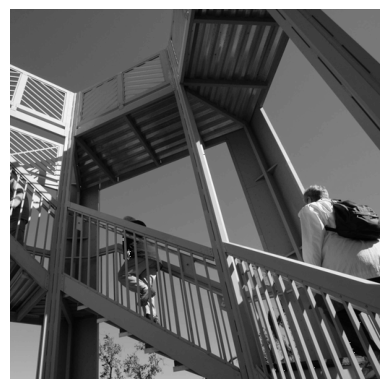

In [1]:
import numpy as np
from scipy import datasets
import matplotlib.pyplot as plt


# We load a sample image
img = datasets.ascent()

plt.imshow(img, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.show()

Creamos una copia de la imagen.

In [2]:
img_transformed = np.copy(img)
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]

Definimos un filtro a utilizar.

In [3]:
# Let's experiment with different values

filter = [[1, 2, 1], [2, 4, 2], [1, 2, 1]]
# filter = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

weight = 1 / 8

Realizamos las operaciones.

In [4]:
for x in range(1, size_x - 1):
  for y in range(1, size_y - 1):
      convolution = 0.0
      convolution = convolution + (img[x - 1, y - 1] * filter[0][0])
      convolution = convolution + (img[x, y - 1] * filter[0][1])
      convolution = convolution + (img[x + 1, y - 1] * filter[0][2])
      convolution = convolution + (img[x - 1, y] * filter[1][0])
      convolution = convolution + (img[x, y] * filter[1][1])
      convolution = convolution + (img[x + 1, y] * filter[1][2])
      convolution = convolution + (img[x - 1, y + 1] * filter[2][0])
      convolution = convolution + (img[x, y + 1] * filter[2][1])
      convolution = convolution + (img[x + 1, y + 1] * filter[2][2])
      convolution = convolution * weight
      
      if convolution < 0:
        convolution = 0
      if convolution > 255:
        convolution = 255
      
      img_transformed[x, y] = convolution

Veamos los resultados de convolución.

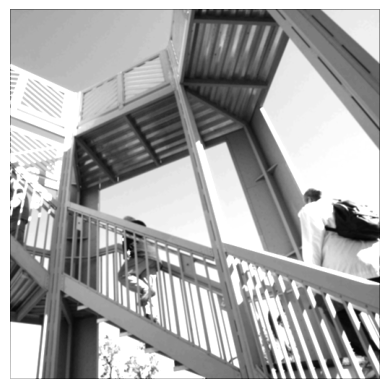

In [5]:
plt.imshow(img_transformed, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.show()


### Pooling en imágenes

Exploremos qué sucede cuando reducimos la información de una imagen a través de pooling.


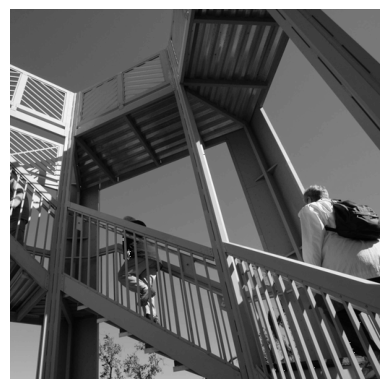

In [6]:
import numpy as np
import skimage.measure


img_transformed = np.copy(img)

plt.imshow(img_transformed, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.show()

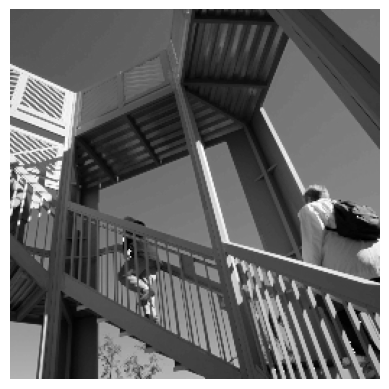

In [7]:
img_transformed = skimage.measure.block_reduce(img_transformed, (2,2), np.max)

plt.imshow(img_transformed, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.show()

## **Sección IX**


### Redes convolucionales

**Spoiler:** Nuevamente, intentemos escalar posibles resultados al tener muchos filtros dentro de una red neuronal.

Para ello, crearemos un modelo de red neuronal convolucional profunda, que utilice, precisamente, convoluciones en sus capas.

Nos basaremos en un modelo LeNet5 propuesto por un gran investigador, Yann LeCun:

<center>
    <img src="https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg" width="60%">
</center>

In [ ]:
cnn_model = tf.keras.models.Sequential([
                                    
    # First conv layer + subsampling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Second conv layer + subsampling
    # TODO. Conv2D -> 256, (3, 3), ReLU
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # TODO. MaxPool

    # Third layer (flatten)
    tf.keras.layers.Flatten(),

    # Fourth layer (dense)
    # TODO. Dense -> 128, ReLU
    tf.keras.layers.Dense(128, activation='relu'),

    # Fifth layer (output)
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn_model.compile(
    optimizer=tf.optimizers.SGD(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
cnn_model.fit(training_images, training_labels, epochs=2)

In [ ]:
cnn_model.evaluate(test_images, test_labels)

In [ ]:
import random

test_index = random.randint(0, 10000 - 1)

plt.imshow(test_images[test_index], cmap='viridis')
plt.axis(False)

print("Label:", test_labels[test_index])
input_image = np.reshape(test_images[test_index], (1, 28, 28, 1))
prediction = cnn_model.predict(input_image)
print("Prediction:", np.argmax(prediction))

**¡Felicidades! Has implementado y entrenado exitosamente tu modelo para clasificar algunas imágenes.**

**Reto:** ¿Puedes mejorar aún más el modelo?

Te recomiendo explorar lo siguiente:
- Modifica el número de capas y parámetros de convolución por capa
- Modifica el número de épocas de entrenamiento
- Explora resultados con otros conjuntos de datos
- ¿Exportar modelos entrenados? Ojo: https://www.tensorflow.org/guide/keras/save_and_serialize?hl=es-419

> **Para resolver la tarea, el reto es:** Mejor accuracy obtenido en la clase.

**Puedes explorar:**
- El número de capas.
- Las épocas de entrenamiento.
- Las funciones de activación.
- Investigar otras capas.

--------

> Contenido creado por **Rodolfo Ferro**, 2023. <br>
> Puedes contactarme a través de Insta ([@rodo_ferro](https://www.instagram.com/rodo_ferro/)) o Twitter ([@rodo_ferro](https://twitter.com/rodo_ferro)).